This model is trained with EfficientNet 

Image size 512x512

Preprocessing - horizontal flip

5 epochs

accuracy on validation set 0.9796

loss 0.0758

Notes:

Before adding horizontal flipping, model overfitted and was stuck on 0.6479 accuracy for 5 epochs

Suggestions:
1. make dataset bigger
2. use different data augmentation metric

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

from sklearn.model_selection import train_test_split

import pandas as pd
import os.path
from os import path
import shutil

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
FILE_PATH = "/content/drive/MyDrive/ML Covid-19 detection/Datasets/covid-chestxray-dataset/metadata.csv"
IMAGES_PATH = "/content/drive/MyDrive/ML Covid-19 detection/Datasets/covid-chestxray-dataset/images"
df = pd.read_csv(FILE_PATH)
print(df.shape)

(950, 30)


In [4]:
df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [5]:
if not os.path.exists('./Dataset'):
  os.mkdir('./Dataset')
  print("Dataset folder created")

Dataset folder created


In [6]:
COVID_DIR = "/content/Dataset/Covid"

if not os.path.exists(COVID_DIR):
    os.mkdir(COVID_DIR)
    print("Covid folder created")


Covid folder created


In [7]:
cnt = 0
for (i, row) in df.iterrows():
    if row["finding"]=="Pneumonia/Viral/COVID-19" and row["view"]=="PA":
        filename = row["filename"]
        image_path = os.path.join(IMAGES_PATH, filename)
        image_copy_path = os.path.join(COVID_DIR, filename)
        shutil.copy2(image_path, image_copy_path)
        #print("Moving image: ", cnt)
        cnt += 1
        
#print(cnt)

In [8]:
# sampling of images from Kaggle

import random
NORMAL_PATH = "/content/drive/MyDrive/ML Covid-19 detection/Datasets/chest_xray/train/NORMAL"
NORMAL_DIR = "/content/Dataset/Normal"

if not os.path.exists(NORMAL_DIR):
    os.mkdir(NORMAL_DIR)
    print("Normal folder created")

Normal folder created


In [9]:
image_names = os.listdir(NORMAL_PATH)
random.shuffle(image_names)

In [10]:
for i in range(196):
    image_name = image_names[i]
    image_path = os.path.join(NORMAL_PATH, image_name)
    target_path = os.path.join(NORMAL_DIR, image_name)
    
    shutil.copy2(image_path, target_path)

  # Dataset created

In [11]:
import PIL
import cv2
import PIL.Image as Image
import tensorflow as tf
import tensorflow_hub as hub

In [12]:
IMAGE_SHAPE = (512, 512)
# model = tf.keras.Sequential([
#     hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b5/classification/1")
# ])
# model.build([None, IMAGE_SHAPE[0], IMAGE_SHAPE[1], 3])
# model.summary()

In [13]:
import pathlib

data_dir = "./Dataset"
data_dir = pathlib.Path(data_dir)

In [14]:
data_dir

PosixPath('Dataset')

In [15]:
list(data_dir.glob('./*/*.jpeg'))[:5]

[PosixPath('Dataset/Normal/IM-0487-0001.jpeg'),
 PosixPath('Dataset/Normal/NORMAL2-IM-1096-0001.jpeg'),
 PosixPath('Dataset/Normal/IM-0644-0001.jpeg'),
 PosixPath('Dataset/Normal/IM-0133-0001.jpeg'),
 PosixPath('Dataset/Normal/IM-0620-0001-0001.jpeg')]

In [16]:
image_count = len(list(data_dir.glob('./*/*.jpg'))) + len(list(data_dir.glob('./*/*.jpeg')))
print(image_count)

344


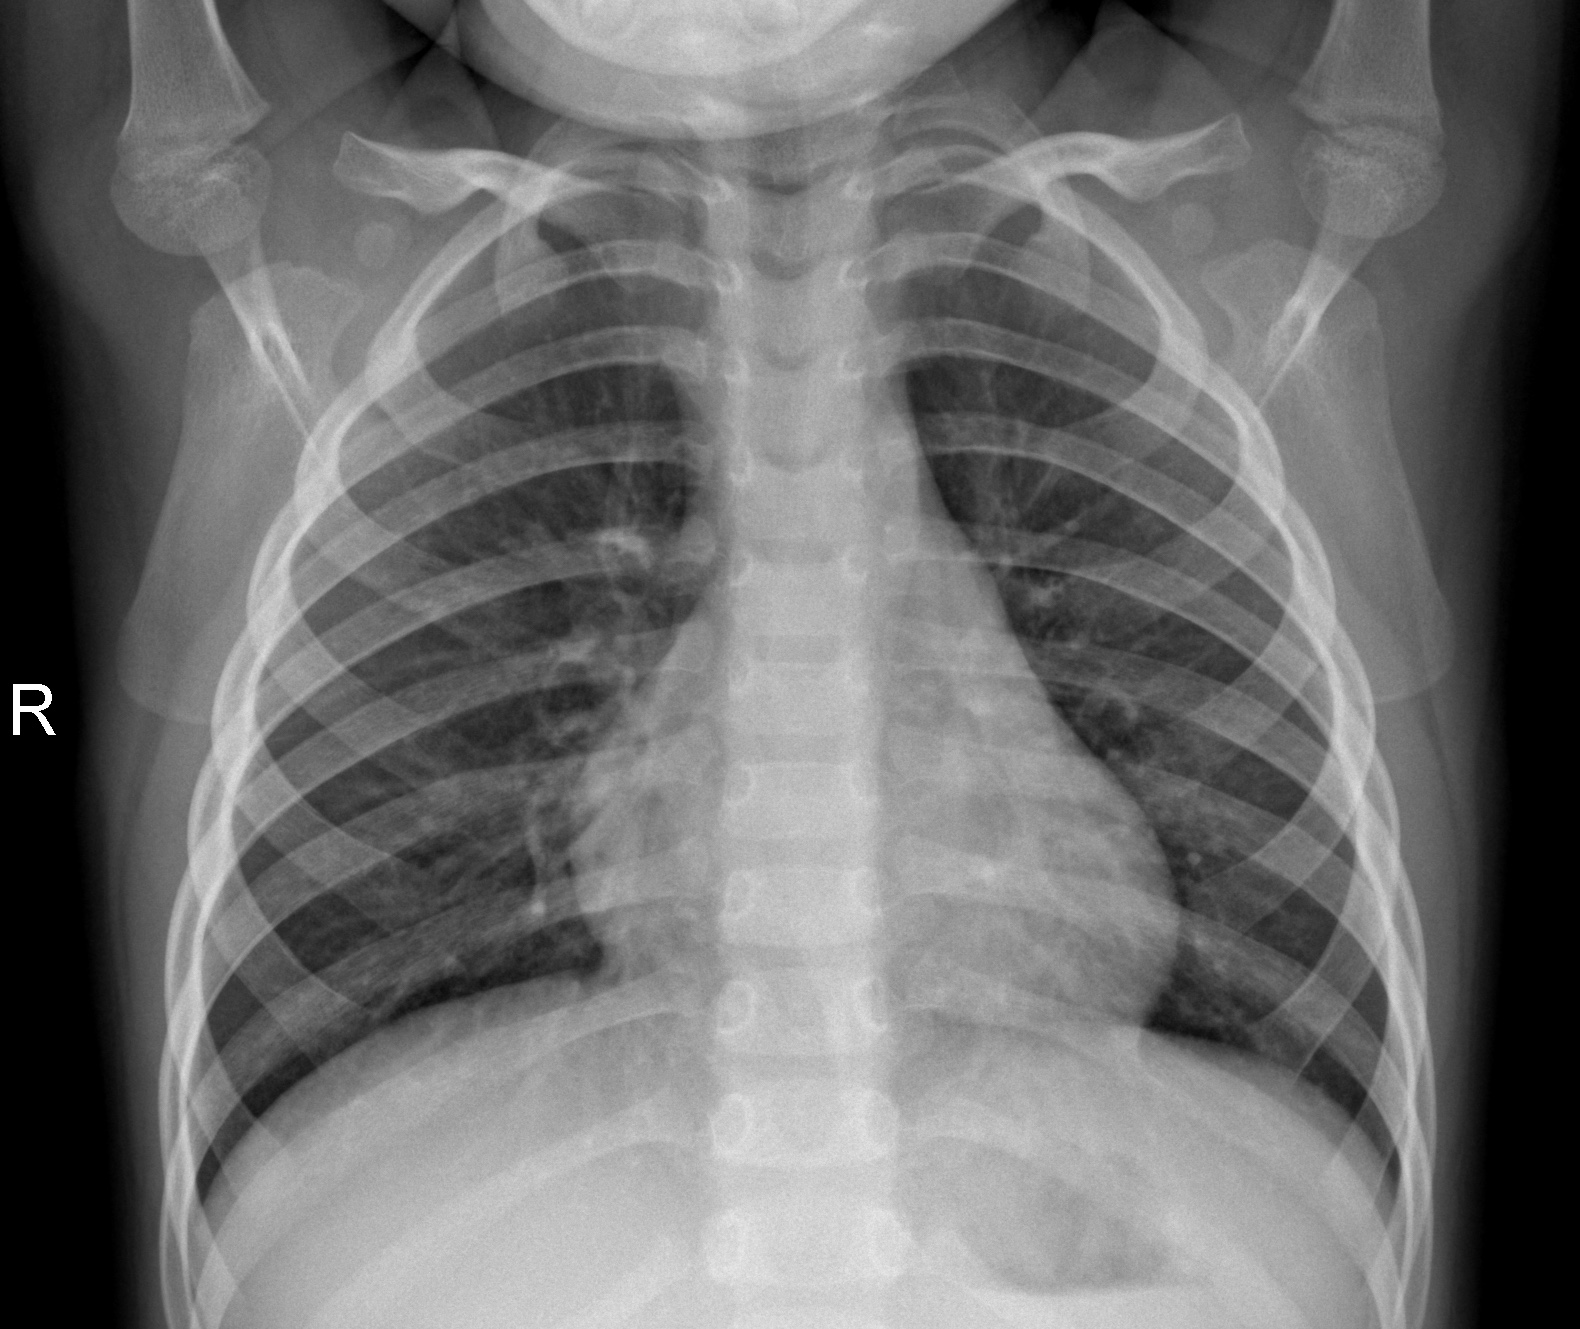

In [17]:
normal_images = list(data_dir.glob('./Normal/*'))
PIL.Image.open(str(normal_images[1]))

In [18]:
xray_images_dict = {
    'covid': list(data_dir.glob('./Covid/*')),
    'normal': list(data_dir.glob('./Normal/*')),
}

xray_labels_dict = {
    'covid': 0,
    'normal': 1,
}

In [19]:
X, y = [], []

for xray_type, images in xray_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,IMAGE_SHAPE)
        X.append(resized_img)
        y.append(xray_labels_dict[xray_type])

In [20]:
X = np.array(X)
y = np.array(y)

In [21]:
horizontal_flip = keras.Sequential([
    tf.keras.layers.RandomFlip(mode='horizontal', seed=None)
])

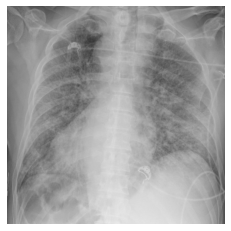

In [22]:
plt.axis('off')
plt.imshow(horizontal_flip(X)[6].numpy().astype("uint8"))

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
print(len(X_test))

98


In [25]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [26]:
X[0].shape

(512, 512, 3)

In [27]:
feature_extractor_model = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=IMAGE_SHAPE+(3,), trainable=False)

In [28]:
num_of_classes = 2

model = tf.keras.Sequential([
  horizontal_flip,
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])
model.build([None, IMAGE_SHAPE[0], IMAGE_SHAPE[1], 3])  # Batch input shape.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 512, 512, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1280)              207615832 
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 207,618,394
Trainable params: 2,562
Non-trainable params: 207,615,832
_________________________________________________________________


In [30]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=10)

Epoch 1/10
10/10 [==============================] - 134s 8s/step - loss: 0.5838 - accuracy: 0.6803 - val_loss: 0.3313 - val_accuracy: 0.9082
Epoch 2/10
10/10 [==============================] - 66s 7s/step - loss: 0.2217 - accuracy: 0.9728 - val_loss: 0.1403 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 70s 7s/step - loss: 0.1255 - accuracy: 0.9626 - val_loss: 0.0839 - val_accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 66s 7s/step - loss: 0.0859 - accuracy: 0.9864 - val_loss: 0.0586 - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 66s 7s/step - loss: 0.0707 - accuracy: 0.9796 - val_loss: 0.0464 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 66s 7s/step - loss: 0.0582 - accuracy: 0.9898 - val_loss: 0.0403 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 66s 7s/step - loss: 0.0529 - accuracy: 0.9864 - val_loss: 0.0353 - val_accuracy: 1.0000
Epoch 8/10
10/10 [=

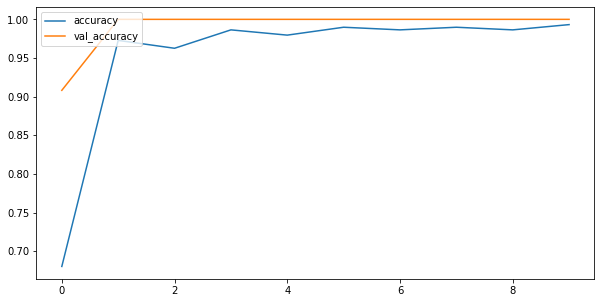

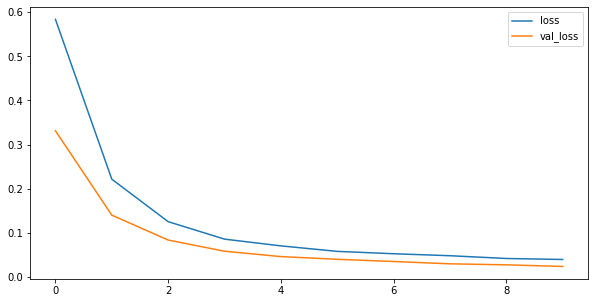

In [31]:
# training validation accuracy plot
plt.figure(figsize=(10,5))
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.legend(loc='upper left')

# training validation loss plot
# Plotting train_loss vs val_loss
plt.figure(figsize=(10,5))
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend()